In [1]:
import pandas as pd
import os

In [2]:
data = pd.read_csv("dataset/sample_submission.csv")

In [3]:
data.head(2)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984


In [4]:
data["color"].value_counts()

color
G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: count, dtype: int64

In [5]:

data.sample(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
24705,24706,0.31,Very Good,H,VS1,62.8,58.0,4.29,4.31,2.70,544
26406,26407,0.32,Ideal,G,VVS2,61.7,57.0,4.41,4.44,2.73,730
21812,21813,0.34,Ideal,G,IF,61.6,56.0,4.48,4.51,2.77,1014
14244,14245,0.43,Good,G,SI1,63.1,58.0,4.75,4.79,3.01,704
4921,4922,0.59,Ideal,D,SI1,61.4,55.0,5.41,5.43,3.33,1783
19868,19869,0.51,Ideal,F,VVS2,62.2,57.0,5.12,5.14,3.19,2082
3157,3158,0.30,Good,E,VVS2,61.1,61.0,4.32,4.36,2.65,622
17901,17902,0.41,Ideal,F,VS1,61.3,57.0,4.79,4.77,2.93,1076
9575,9576,1.00,Very Good,J,SI2,62.8,54.0,6.35,6.43,4.01,3991
11889,11890,0.33,Ideal,G,VVS2,62.6,53.0,4.45,4.43,2.78,901


In [6]:

data.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [7]:
data.dropna(inplace=True)  # Removes all rows with any null value


In [8]:

data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [9]:
data.size

288970

In [10]:

data.shape

(26270, 11)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26270 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26270 non-null  int64  
 1   carat       26270 non-null  float64
 2   cut         26270 non-null  object 
 3   color       26270 non-null  object 
 4   clarity     26270 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26270 non-null  float64
 7   x           26270 non-null  float64
 8   y           26270 non-null  float64
 9   z           26270 non-null  float64
 10  price       26270 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.4+ MB


In [13]:
data.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [14]:
data.drop(labels=["Unnamed: 0"],axis=1,inplace=True)

In [15]:
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [16]:
data.duplicated().sum()

34

In [17]:
data.drop_duplicates(inplace=True)


In [18]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 26236 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26236 non-null  float64
 1   cut      26236 non-null  object 
 2   color    26236 non-null  object 
 3   clarity  26236 non-null  object 
 4   depth    26236 non-null  float64
 5   table    26236 non-null  float64
 6   x        26236 non-null  float64
 7   y        26236 non-null  float64
 8   z        26236 non-null  float64
 9   price    26236 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.2+ MB


In [19]:
cat_columns=data.columns[data.dtypes=="object"]

In [20]:
num_columns=data.columns[data.dtypes!="object"]

In [21]:

data[num_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26236.0,0.797620,0.476691,0.2,0.40,0.70,1.05,4.50
depth,26236.0,61.745285,1.412243,50.8,61.00,61.80,62.50,73.60
table,26236.0,57.455877,2.230866,49.0,56.00,57.00,59.00,79.00
x,26236.0,5.728646,1.126332,0.0,4.71,5.69,6.54,10.23
y,26236.0,5.732487,1.165283,0.0,4.72,5.70,6.54,58.90
z,26236.0,3.536339,0.698608,0.0,2.90,3.52,4.04,8.06
price,26236.0,3935.926818,4019.809223,326.0,945.00,2374.00,5356.00,18818.00


In [22]:

data[cat_columns]

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1
...,...,...,...
26962,Premium,G,SI1
26963,Ideal,H,IF
26964,Premium,E,VS2
26965,Very Good,F,VVS2


In [23]:
for col in cat_columns:
    print(data[col].value_counts())
    print(f"here is the total count:{len(data[col].value_counts())}")
    print("=======================")

cut
Ideal        10535
Premium       6694
Very Good     5875
Good          2376
Fair           756
Name: count, dtype: int64
here is the total count:5
color
G    5521
E    4792
F    4606
H    3984
D    3265
I    2670
J    1398
Name: count, dtype: int64
here is the total count:7
clarity
SI1     6402
VS2     5919
SI2     4436
VS1     3985
VVS2    2478
VVS1    1791
IF       871
I1       354
Name: count, dtype: int64
here is the total count:8


In [24]:
data[num_columns]

,carat,depth,table,x,y,z,price
0,0.30,62.1,58.0,4.27,4.29,2.66,499
1,0.33,60.8,58.0,4.42,4.46,2.70,984
2,0.90,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...
26962,1.11,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,61.8,56.0,4.19,4.20,2.60,682


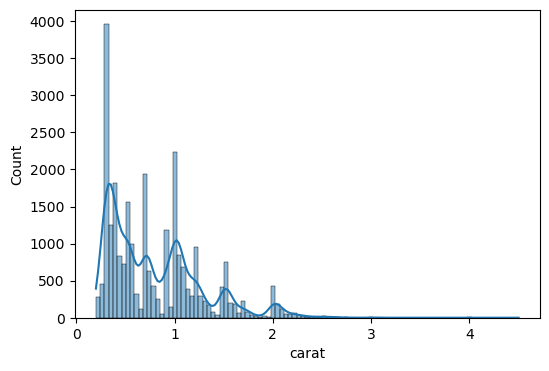

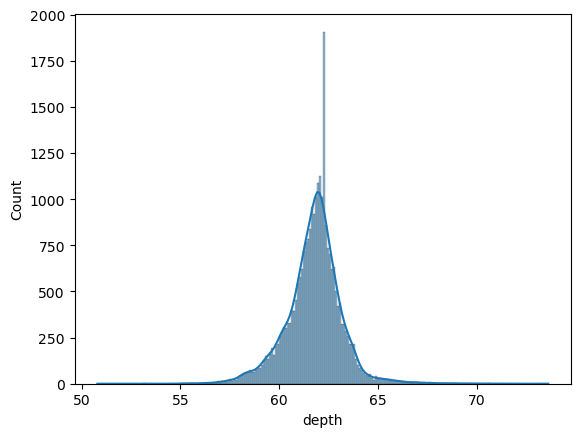

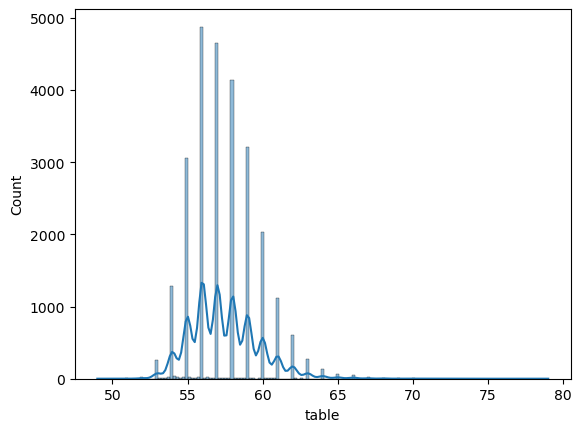

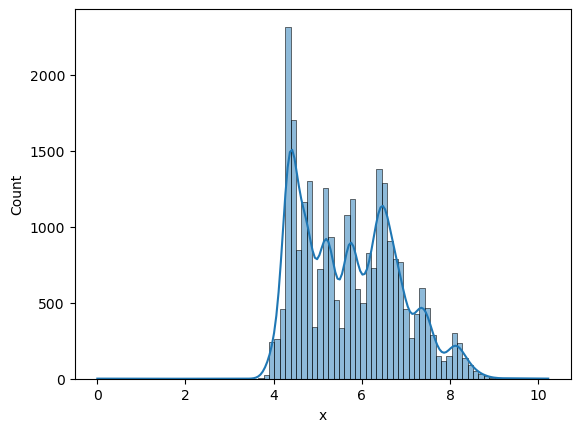

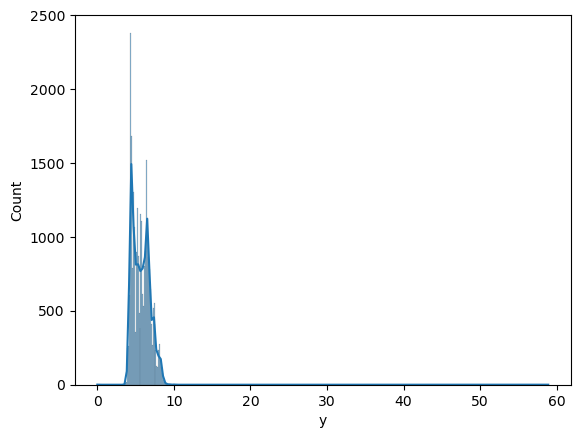

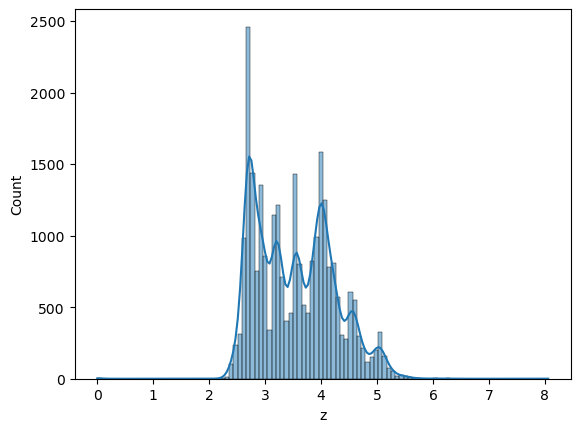

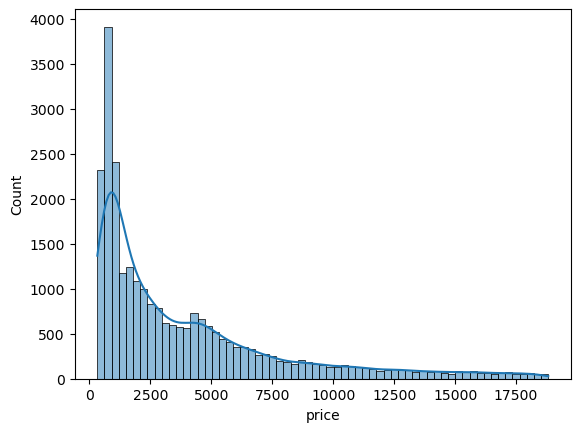

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))

for col in num_columns:
    sns.histplot(data=data,x=col,kde=True)
    print("\n")
    plt.show()

<Axes: >

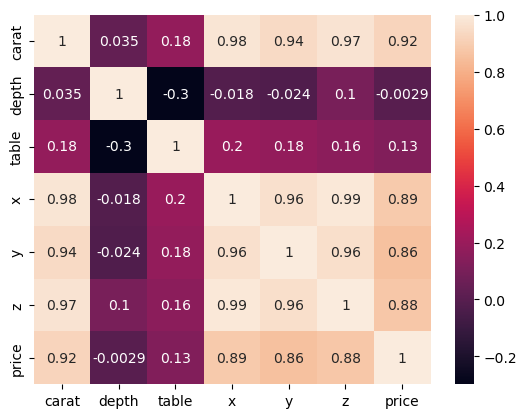

In [27]:
sns.heatmap(data[num_columns].corr(),annot=True)

In [26]:
data[cat_columns]

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1
...,...,...,...
26962,Premium,G,SI1
26963,Ideal,H,IF
26964,Premium,E,VS2
26965,Very Good,F,VVS2


In [27]:
# it is a oridinal encoding
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

data["cut"]=data["cut"].map(cut_map)
data["clarity"]=data["clarity"].map(clarity_map)
data["color"]=data["color"].map(color_map)

In [28]:
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,2,3,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,4,8,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,2,6,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,3,5,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,3,7,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,4,4,3,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,5,5,8,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,4,2,4,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,3,3,6,61.8,56.0,4.19,4.20,2.60,682


In [29]:
import pandas as pd
data = pd.read_csv("dataset/sample_submission.csv")

In [30]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [31]:
data.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [32]:
X=data.drop(labels=["Unnamed: 0","price"],axis=1)
y=data["price"]

In [33]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65
...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60


In [34]:
y

0         499
1         984
2        6289
3        1082
4         779
         ... 
26962    5408
26963    1114
26964    1656
26965     682
26966    5166
Name: price, Length: 26967, dtype: int64

In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.9+ MB


In [36]:
X.select_dtypes(include="object")

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1
...,...,...,...
26962,Premium,G,SI1
26963,Ideal,H,IF
26964,Premium,E,VS2
26965,Very Good,F,VVS2


In [37]:

X.select_dtypes(exclude="object")

,carat,depth,table,x,y,z
0,0.30,62.1,58.0,4.27,4.29,2.66
1,0.33,60.8,58.0,4.42,4.46,2.70
2,0.90,62.2,60.0,6.04,6.12,3.78
3,0.42,61.6,56.0,4.82,4.80,2.96
4,0.31,60.4,59.0,4.35,4.43,2.65
...,...,...,...,...,...,...
26962,1.11,62.3,58.0,6.61,6.52,4.09
26963,0.33,61.9,55.0,4.44,4.42,2.74
26964,0.51,61.7,58.0,5.12,5.15,3.17
26965,0.27,61.8,56.0,4.19,4.20,2.60


In [38]:
cat_cols=X.select_dtypes(include="object").columns

num_cols=X.select_dtypes(exclude="object").columns

In [39]:
cat_cols

Index(['cut', 'color', 'clarity'], dtype='object')

In [40]:
num_cols

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [41]:

X.select_dtypes(include="object").head()

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1


In [42]:

X["clarity"].value_counts()

clarity
SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: count, dtype: int64

In [44]:
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [45]:
num_pipeline=Pipeline(
    steps=[
        ("imputer",SimpleImputer()),
        ("scaler",StandardScaler())
    ]
)

In [46]:
cat_pipeline=Pipeline(

    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("ordinalencoder",OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories]))

    ]
)

In [47]:
num_cols

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [48]:
cat_cols

Index(['cut', 'color', 'clarity'], dtype='object')

In [50]:
preprocessor=ColumnTransformer(

    [
        ("num_pipeline",num_pipeline,num_cols),
        ("cat_pipeline",cat_pipeline,cat_cols)
    ]
)

In [52]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65
...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60


In [53]:
y

0         499
1         984
2        6289
3        1082
4         779
         ... 
26962    5408
26963    1114
26964    1656
26965     682
26966    5166
Name: price, Length: 26967, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30, random_state=42)

In [55]:
X_test.shape

(8091, 9)

In [57]:
y_train.head()

19040     5567
396      13088
15626      544
16597    15254
5811       491
Name: price, dtype: int64

In [58]:
preprocessor.fit_transform(X_train)

array([[ 0.78796449, -0.96571264,  3.36584017, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.85115314, -0.4608357 , -1.09584537, ...,  4.        ,
         2.        ,  6.        ],
       [-1.02344341, -0.10020932,  0.68882884, ...,  2.        ,
         5.        ,  5.        ],
       ...,
       [-0.85494035,  0.        , -0.64967682, ...,  4.        ,
         3.        ,  6.        ],
       [-0.98131764, -0.4608357 , -0.64967682, ...,  4.        ,
         6.        ,  2.        ],
       [-1.02344341,  0.4767929 , -1.54201393, ...,  4.        ,
         1.        ,  3.        ]])

In [59]:
preprocessor.transform(X_test)

array([[ 0.64052431, -0.89358736,  1.1349974 , ...,  2.        ,
         2.        ,  2.        ],
       [-0.81281458,  1.27017095, -1.09584537, ...,  1.        ,
         1.        ,  1.        ],
       [-1.1498207 , -1.3984643 ,  0.68882884, ...,  3.        ,
         4.        ,  6.        ],
       ...,
       [ 1.69366844, -1.1099632 ,  0.24266029, ...,  3.        ,
         5.        ,  3.        ],
       [-0.56005999, -0.82146209, -0.20350827, ...,  4.        ,
         0.        ,  3.        ],
       [-1.00238053, -0.02808404, -1.09584537, ...,  4.        ,
         1.        ,  6.        ]])

In [60]:
preprocessor.transform(X_test)

array([[ 0.64052431, -0.89358736,  1.1349974 , ...,  2.        ,
         2.        ,  2.        ],
       [-0.81281458,  1.27017095, -1.09584537, ...,  1.        ,
         1.        ,  1.        ],
       [-1.1498207 , -1.3984643 ,  0.68882884, ...,  3.        ,
         4.        ,  6.        ],
       ...,
       [ 1.69366844, -1.1099632 ,  0.24266029, ...,  3.        ,
         5.        ,  3.        ],
       [-0.56005999, -0.82146209, -0.20350827, ...,  4.        ,
         0.        ,  3.        ],
       [-1.00238053, -0.02808404, -1.09584537, ...,  4.        ,
         1.        ,  6.        ]])

In [61]:

preprocessor.get_feature_names_out()

array(['num_pipeline__carat', 'num_pipeline__depth',
       'num_pipeline__table', 'num_pipeline__x', 'num_pipeline__y',
       'num_pipeline__z', 'cat_pipeline__cut', 'cat_pipeline__color',
       'cat_pipeline__clarity'], dtype=object)

In [62]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [63]:
X_train

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,0.787964,-0.965713,3.365840,0.964420,0.934381,0.813401,1.0,0.0,1.0
1,0.851153,-0.460836,-1.095845,1.008892,1.041947,0.957195,4.0,2.0,6.0
2,-1.023443,-0.100209,0.688829,-1.259163,-1.252793,-1.257232,2.0,5.0,5.0
3,2.936379,0.548918,-0.649677,2.298570,2.252064,2.366376,4.0,5.0,1.0
4,-1.044506,0.260417,-0.203508,-1.294740,-1.279684,-1.257232,4.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...
18871,-0.812815,-0.677212,-0.203508,-0.850024,-0.831493,-0.897747,4.0,2.0,4.0
18872,-0.981318,-1.470590,0.688829,-1.072382,-1.073516,-1.199714,2.0,4.0,4.0
18873,-0.854940,0.000000,-0.649677,-0.947861,-0.921131,-0.912126,4.0,3.0,6.0
18874,-0.981318,-0.460836,-0.649677,-1.099065,-1.055588,-1.113438,4.0,6.0,2.0


In [64]:
X_test

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,0.640524,-0.893587,1.134997,0.822111,0.844743,0.712745,2.0,2.0,2.0
1,-0.812815,1.270171,-1.095845,-0.921178,-0.894240,-0.782712,1.0,1.0,1.0
2,-1.149821,-1.398464,0.688829,-1.472627,-1.467924,-1.573579,3.0,4.0,6.0
3,1.525165,0.765294,-0.649677,1.418031,1.409464,1.517991,4.0,4.0,5.0
4,-0.791752,0.260417,-1.095845,-0.841129,-0.822529,-0.797091,4.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...
8086,-1.044506,-1.254214,1.134997,-1.241374,-1.279684,-1.357888,3.0,3.0,4.0
8087,-1.023443,-0.172335,-0.649677,-1.205797,-1.234865,-1.228473,4.0,4.0,5.0
8088,1.693668,-1.109963,0.242660,1.693755,1.642523,1.489233,3.0,5.0,3.0
8089,-0.560060,-0.821462,-0.203508,-0.431990,-0.401229,-0.495124,4.0,0.0,3.0


model training

In [65]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [77]:
models={

    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'xgboost':XGBRegressor(),
    'Elasticnet':ElasticNet(),
    'Randomforest':RandomForestRegressor(),
    

} 

In [78]:
train_model_list=[]
model_list=[]
r2_list=[]

In [79]:
list(models)

['LinearRegression', 'Lasso', 'Ridge', 'xgboost', 'Elasticnet', 'Randomforest']

In [80]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    print(model)

LinearRegression()
Lasso()
Ridge()
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
ElasticNet()
RandomForestRegressor()


In [81]:
models.keys()

dict_keys(['LinearRegression', 'Lasso', 'Ridge', 'xgboost', 'Elasticnet', 'Randomforest'])

In [82]:
list(models.values())[1]

Lasso()

In [83]:
def evaluate_model(true,pred):
    r2=r2_score(true,pred)
    mae=mean_absolute_error(true,pred)
    mse=mean_squared_error(true,pred)
    return mae, mse,r2

In [85]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    
    model.fit(X_train,y_train)

    #make_prediction
    y_pred=model.predict(X_test)

    #this is for the validaiton
    MAE,MSE,R2=evaluate_model(y_test,y_pred)


    print("model training performance",model)
    print("MSE:", MSE)
    print("MAE:",MAE)
    print("R2 SCORE:",R2)

    r2_list.append(R2)

    print("="*40)
    print("\n")

model training performance LinearRegression()
MSE: 2518489.565802648
MAE: 835.8816985465177
R2 SCORE: 0.8478461311276582




c:\Users\RIMJHIM\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.557e+08, tolerance: 3.029e+07
  model = cd_fast.enet_coordinate_descent(


model training performance Lasso()
MSE: 1870799.8230695946
MAE: 830.8083544424316
R2 SCORE: 0.886976132507814


model training performance Ridge()
MSE: 2438540.2268779795
MAE: 835.4762963128155
R2 SCORE: 0.8526762489079149


model training performance XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
M

In [74]:
r2_list

[0.8478461311276582,
 0.886976132507814,
 0.8526762489079149,
 0.829655190644883,
 0.980741219733444,
 0.9804626703262329]

In [75]:
max(r2_list)

0.980741219733444